# ANOVA with ad-hoc multiple tests for dominant frequency (DF) detection

- ### An illustrative example to show the idea of tests.
- ### Repeat the procedure for all files.
- ### Save the results.

### 1. Read in example file and preprocess data

In [3]:
rm(list=ls())

# include packages
library(dplyr)
library(stringr)
library(tibble)
library(ggplot2)
library(multcomp)
library(utils)


Use file '14-18_Trial05_chpaddle01.csv' as an illustrative exapmle. Dominant frequency(DF) can be visually detected in this example.

In [4]:
# read example data
# first column = frequency in cpm
# 2nd to last column = power over time (extract from time windows)


filename = '14-18_Trial05_chpaddle01.csv'
freq_data = read.csv(filename,na="")
head(freq_data)

Row,w0,w0_5,w1,w1_5,w2,w2_5,w3,w3_5,w4,...,w14_5,w15,w15_5,w16,w16_5,w17,w17_5,w18,w18_5,w19
6.0,1386.799,4961.676,1410.825,956.4754,1165.46938,10460.5447,6098.140,216.9147,341.9505,...,1.976587,131.2728,27.43924,5.951749,0.5248125,2.4145032,11.930053,12.61946,4.503350,6.998679
6.3,2431.249,7262.148,2756.635,904.6250,964.39043,12622.4456,8149.848,260.1514,374.7891,...,5.080499,192.8473,51.14581,13.772046,1.0646783,0.3417527,8.247015,13.38775,9.361819,8.229449
6.6,3213.452,8621.371,4354.158,577.1479,277.71245,11528.8294,10083.380,394.7478,366.2508,...,33.543356,238.7821,97.39512,29.337524,2.2451300,4.0593645,2.419932,17.79931,17.389107,10.545041
6.9,3228.182,8695.317,5787.836,399.2002,59.80907,7472.2815,10797.601,683.5675,320.5515,...,74.355723,256.5162,149.82806,56.807234,5.4458971,17.0511763,9.146543,36.91621,29.507338,15.136306
7.2,2797.726,7781.322,6780.359,605.7169,1375.80285,2968.3775,9448.194,1104.9204,247.0349,...,113.198708,242.6424,169.93774,99.338338,12.7059038,35.7005083,38.804834,78.09313,45.074560,24.120590
7.5,3311.964,6755.773,7421.657,867.5728,4179.08867,410.7615,6439.019,1546.7520,161.5100,...,159.056785,202.7660,137.91201,155.222384,23.9051477,48.7736093,80.805347,131.19752,62.963952,41.583796


In [5]:
# Pick up unoverlapped 1-min time windows 
lastcol = names(freq_data)[ncol(freq_data)]
lastcol = as.numeric(substr(lastcol,2,nchar(lastcol)))
freq_nooverlap = freq_data[,c("Row",paste0("w",0:lastcol))]
head(freq_nooverlap)

Row,w0,w1,w2,w3,w4,w5,w6,w7,w8,...,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19
6.0,1386.799,1410.825,1165.46938,6098.140,341.9505,21.68448,654.2971,1.717319,39.67171,...,151.0501,1419.897,310.8326,924.1847,298.4445,131.2728,5.951749,2.4145032,12.61946,6.998679
6.3,2431.249,2756.635,964.39043,8149.848,374.7891,179.29568,1181.6906,7.966086,75.10028,...,259.0438,2357.894,517.5151,1663.7016,419.5536,192.8473,13.772046,0.3417527,13.38775,8.229449
6.6,3213.452,4354.158,277.71245,10083.380,366.2508,473.01685,1877.7371,19.420175,102.64445,...,356.4421,3448.600,1084.0616,2639.9323,450.5449,238.7821,29.337524,4.0593645,17.79931,10.545041
6.9,3228.182,5787.836,59.80907,10797.601,320.5515,705.22196,2684.8713,4.839838,110.90530,...,436.1494,4307.957,2337.2795,3460.8268,381.1298,256.5162,56.807234,17.0511763,36.91621,15.136306
7.2,2797.726,6780.359,1375.80285,9448.194,247.0349,651.31489,3584.4163,34.764594,96.20378,...,497.2973,4638.324,4386.2514,3643.4819,291.5707,242.6424,99.338338,35.7005083,78.09313,24.120590
7.5,3311.964,7421.657,4179.08867,6439.019,161.5100,412.79702,4639.5071,320.148417,69.80801,...,593.5818,4398.772,6577.9422,3120.3333,259.9626,202.7660,155.222384,48.7736093,131.19752,41.583796


### 2. Plot the data  
![3Dplot](unscaled_3d_waterfall.png)


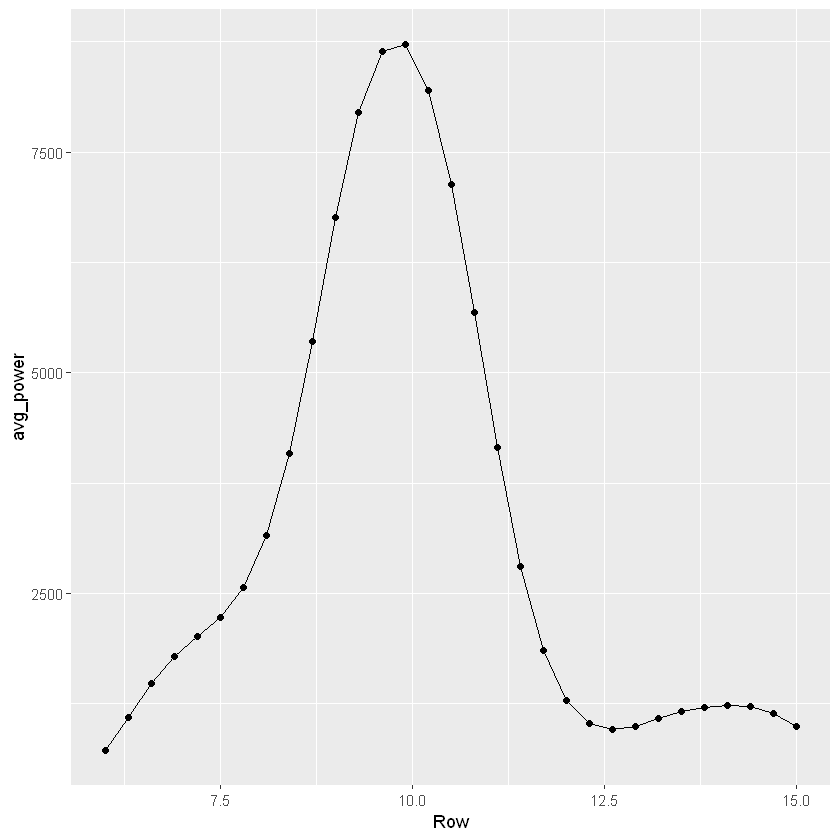

In [6]:
# plot average power vs. frequency
rowmn = rowMeans(freq_nooverlap[,2:ncol(freq_nooverlap)])
plotdata = data.frame(Row = freq_nooverlap$Row, avg_power = rowmn)
ggplot(data = plotdata,aes(x=Row,y=avg_power))+geom_point()+geom_line()

### 3. ANOVA: a test on differences among frequency bins  
p<2e-16  i.e.   Powers are not equal at all frequencies

In [11]:
freq_long = reshape(freq_nooverlap,varying = names(freq_nooverlap)[2:ncol(freq_nooverlap)],v.names = "power",
                    timevar = "time",idvar = "Row",direction = "long")
row.names(freq_long)=NULL
freq_long$time = freq_long$time - 1
freq_long$Row = as.factor(freq_long$Row)

getpv = function(p){
  if(p<=0.0001) pv = "<0.0001" else
    pv = as.character(round(p,4))
  return(pv)
}

freq_lm <- lm(power ~ Row, data = freq_long)
freq_av <- aov(freq_lm)
anova_p = summary(freq_av)[[1]][["Pr(>F)"]][1]
anova_p = getpv(anova_p)
summary(freq_av)

             Df    Sum Sq   Mean Sq F value Pr(>F)    
Row          30 4.328e+09 144270976   7.227 <2e-16 ***
Residuals   589 1.176e+10  19963053                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### 4. Add-hoc multiple comparisons
ANOVA just tell us that not all frequencies behaved equally, without pointing out either how many behaved differently or which ones did. We used to do multiple comparisons between all possible pairs of frequencies. However, 
- the number of pairs were huge, leading to useless adjusted p-values. 
- Powers at adjacent frequency bins are very close, hard to detect significant difference.

Actually, we just need to test the difference among all peaks.  
There are two peaks for this file, we compare these two peaks.  
If there are more than two peaks, we compare the global peak with each of local peaks.

In [24]:
rowmndiff = ((rowmn[2:length(rowmn)] - rowmn[1:(length(rowmn)-1)])>0)*1

peak.loc = c()
for(i.diff in 1:(length(rowmndiff)-1)){
  if(rowmndiff[i.diff+1]<rowmndiff[i.diff])
    peak.loc = c(peak.loc,i.diff+1)
}

rm(i.diff)

peaks = freq_nooverlap$Row[peak.loc]
n.p = length(peak.loc)


# contrast
if(n.p > 1){
pairs = t(combn(peak.loc,m = 2))
contrast = matrix(0,nrow=nrow(pairs),ncol=length(freq_nooverlap$Row))

for(j in 1:nrow(pairs)){
  contrast[j,pairs[j,]] = c(1,-1)}
rm(j)

rownames(contrast) = paste0(freq_nooverlap$Row[pairs[,1]]," vs ",freq_nooverlap$Row[pairs[,2]])

t = glht(freq_lm, linfct = contrast)
a = summary(t)

r = data.frame(Estimate = a$test$coefficients,Std.Error = a$test$sigma,Tvalue = a$test$tstat,PVadj = a$test$pvalues)
r <- r %>% rownames_to_column("Pair")
r$significant = (r$PVadj<0.05)*1

# which freq has the largest average power?
max_mean_freq = freq_nooverlap$Row[rowmn == max(rowmn)]

r_mmf = r[str_detect(r$Pair,as.character(max_mean_freq)),]
df_sig = c("Yes","No")[(sum(r_mmf$significant!=1)>0)+1]
}

if(n.p==1){
  df_sig = "Yes"
  max_mean_freq = freq_nooverlap$Row[rowmn == max(rowmn)]
  }
r_mmf

Pair,Estimate,Std.Error,Tvalue,PVadj,significant
9.9 vs 14.1,7492.64,1412.907,5.302997,1.613878e-07,1


### 5. Summary for this file  
One imput file outputs a row as below.  
multiple files outputs multiple rows in the same format.  
Then save the multiple rows as a csv file.

In [28]:
result = data.frame(filename,anova_p,global_peak = max_mean_freq, df_significance = df_sig)
result

filename,anova_p,global_peak,df_significance
14-18_Trial05_chpaddle01.csv,<0.0001,9.9,Yes


### 6. Scale powers at each time point so that the maximum power at each time point is one.

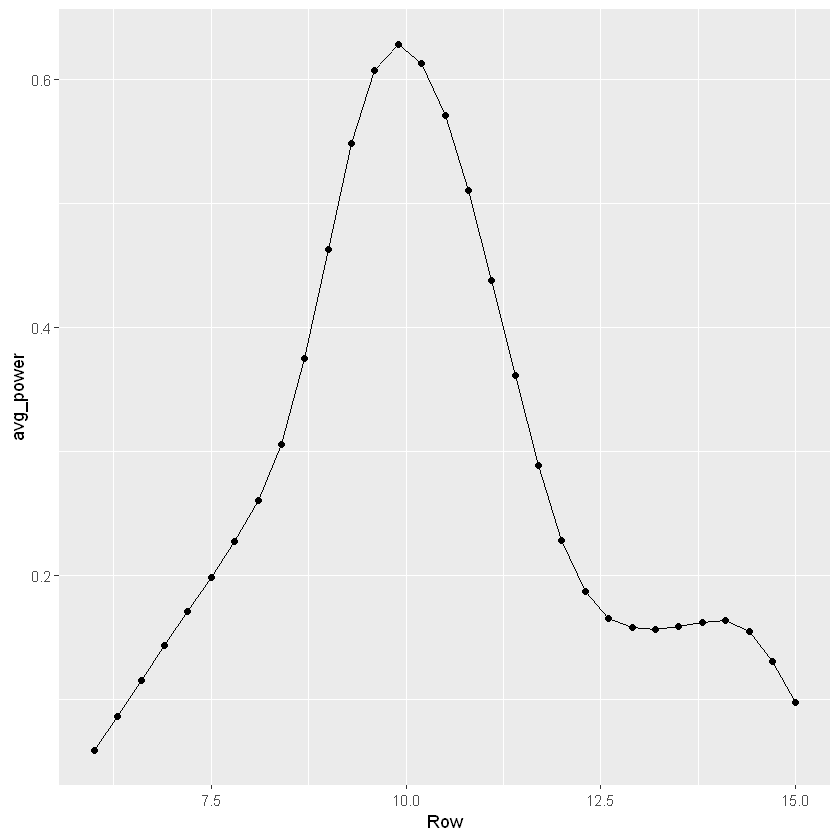

In [30]:
for(j in 2:(lastcol+2)){
    freq_nooverlap[,j] = freq_nooverlap[,j]/max(freq_nooverlap[,j])
  }
  rm(j)
  
freq_long = reshape(freq_nooverlap,varying = names(freq_nooverlap)[2:ncol(freq_nooverlap)],v.names = "power",
                      timevar = "time",idvar = "Row",direction = "long")
  
freq_long$time = freq_long$time - 1
freq_long$Row = as.factor(freq_long$Row)
  
rowmn = rowMeans(freq_nooverlap[,2:ncol(freq_nooverlap)])
plotdata = data.frame(Row = freq_nooverlap$Row, avg_power = rowmn)
ggplot(data = plotdata,aes(x=Row,y=avg_power))+geom_point()+geom_line()

Continue with the similar procedure.